In [ ]:
'''
【项目15】  泰坦尼克号获救问题

数据来源：Kaggle数据集 → 共有1309名乘客数据，其中891是已知存活情况（train.csv），剩下418则是需要进行分析预测的（test.csv）
字段意义：
    PassengerId: 乘客编号
    Survived   :存活情况（存活：1 ; 死亡：0）
    Pclass      : 客舱等级
    Name       : 乘客姓名
    Sex          : 性别
    Age          : 年龄
    SibSp      : 同乘的兄弟姐妹/配偶数
    Parch      : 同乘的父母/小孩数
    Ticket      : 船票编号
    Fare        : 船票价格
    Cabin       :客舱号
    Embarked   : 登船港口
目的：通过已知获救数据，预测乘客生存情况

研究问题：
1、整体来看，存活比例如何？
要求：
① 读取已知生存数据train.csv
② 查看已知存活数据中，存活比例如何？
提示：
① 注意过程中筛选掉缺失值之后再分析
② 这里用seaborn制图辅助研究
  
2、结合性别和年龄数据，分析幸存下来的人是哪些人？
要求：
① 年龄数据的分布情况
② 男性和女性存活情况
③ 老人和小孩存活情况

3、结合 SibSp、Parch字段，研究亲人多少与存活的关系
要求：
① 有无兄弟姐妹/父母子女和存活与否的关系
② 亲戚多少与存活与否的关系

4、结合票的费用情况，研究票价和存活与否的关系
要求：
① 票价分布和存活与否的关系
② 比较研究生还者和未生还者的票价情况

5、利用KNN分类模型，对结果进行预测
要求：
① 模型训练字段：'Survived','Pclass','Sex','Age','Fare','Family_Size'
② 模型预测test.csv样本数据的生还率
提示：
① 训练数据集中，性别改为数字表示 → 1代表男性，0代表女性


'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
# 导入时间模块
% matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

In [ ]:
'''
1、整体来看，存活比例如何？
要求：
① 读取已知生存数据train.csv
② 查看已知存活数据中，存活比例如何？
提示：
① 注意过程中筛选掉缺失值之后再分析
② 这里用seaborn制图辅助研究

'''

In [2]:
# 读取数据

os.chdir('C:/Users/Hjx/Desktop/项目15泰坦尼克号获救问题/')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


存活比例为38.38%


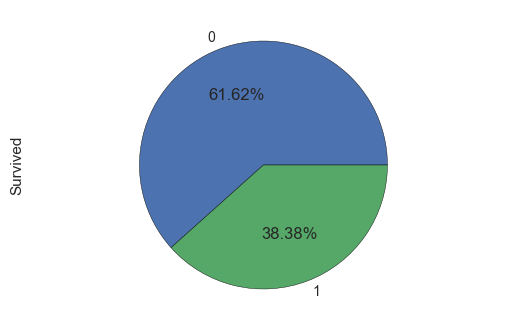

In [6]:
# 已知数据中存活比例

sns.set()
sns.set_style("ticks")
plt.axis('equal')
train_data['Survived'].value_counts().plot.pie(autopct='%1.2f%%')
print('存活比例为38.38%')

In [ ]:
'''
2、结合性别和年龄数据，分析幸存下来的人是哪些人？
要求：
① 年龄数据的分布情况
② 男性和女性存活情况
③ 老人和小孩存活情况

'''

总体年龄分布: 去掉缺失值后样本有714，平均年龄约为30岁，标准差14岁，最小年龄0.42，最大年龄80.


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

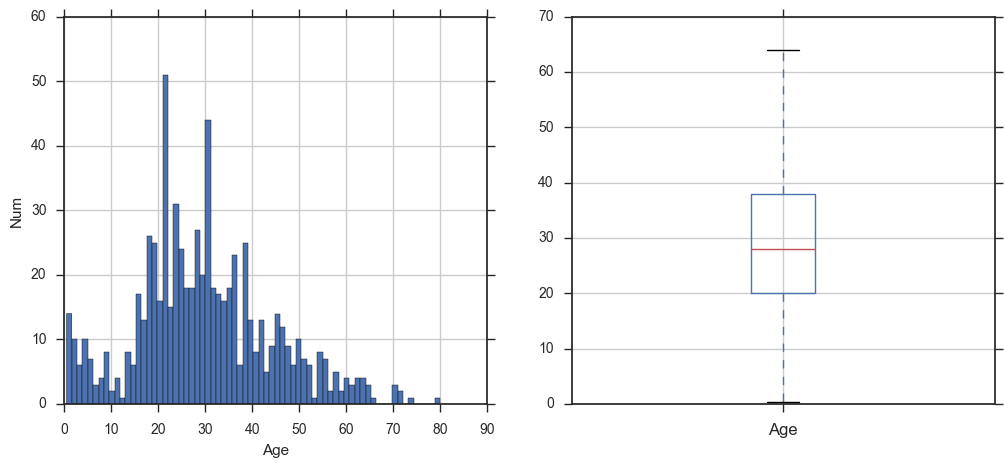

In [7]:
# 年龄数据的分布情况

train_data_age = train_data[train_data['Age'].notnull()]

plt.figure(figsize=(12,5))
plt.subplot(121)
train_data_age['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')
 
plt.subplot(122)
train_data.boxplot(column='Age',showfliers=False)
print('总体年龄分布: 去掉缺失值后样本有714，平均年龄约为30岁，标准差14岁，最小年龄0.42，最大年龄80.')
train_data_age['Age'].describe()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
女性存活率为74.20%，男性存活率为18.89%


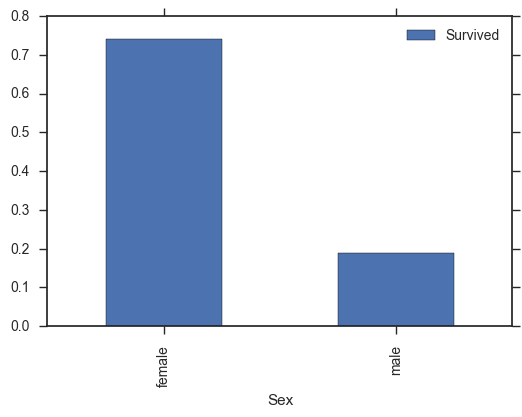

In [8]:
# 男性和女性存活情况

train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
survive_sex = train_data.groupby(['Sex','Survived'])['Survived'].count()
print(survive_sex)
# 女性生存率较高

print('女性存活率为%.2f%%，男性存活率为%.2f%%' % 
     (survive_sex.loc['female',1]/survive_sex.loc['female'].sum()*100, survive_sex.loc['male',1]/survive_sex.loc['male'].sum()*100))


按照不同船舱等级划分 → 船舱等级越高，存活者年龄越大，船舱等级1存活年龄集中在20-40岁，船舱等级2/3中有较多低龄乘客存活
按照性别划分 → 男性女性存活者年龄主要分布在20-40岁，且均有较多低龄乘客，其中女性存活更多


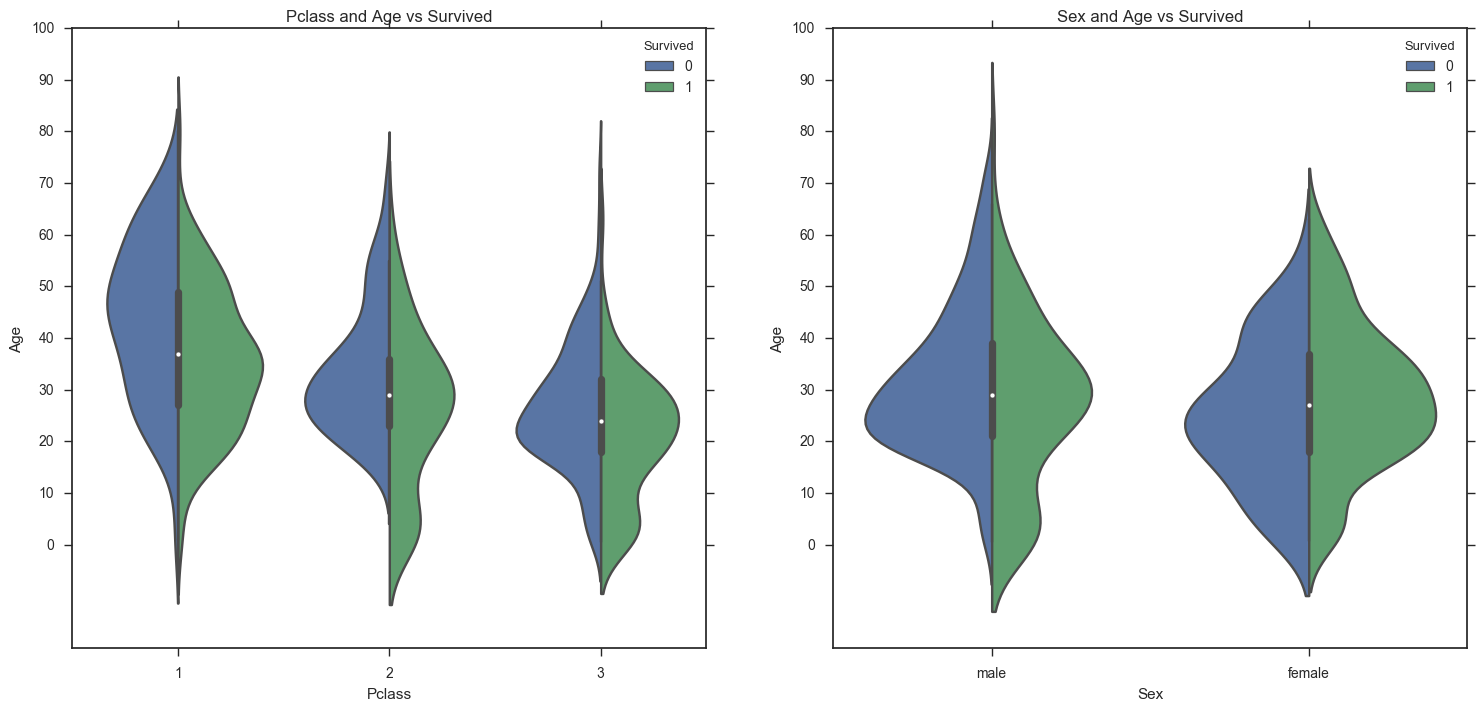

In [9]:
# 年龄与存活的关系

fig,ax = plt.subplots(1,2, figsize = (18,8))

sns.violinplot("Pclass","Age",hue="Survived",data=train_data_age,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
print('按照不同船舱等级划分 → 船舱等级越高，存活者年龄越大，船舱等级1存活年龄集中在20-40岁，船舱等级2/3中有较多低龄乘客存活')

sns.violinplot("Sex","Age",hue="Survived",data=train_data_age,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
print('按照性别划分 → 男性女性存活者年龄主要分布在20-40岁，且均有较多低龄乘客，其中女性存活更多')

灾难中，老人和小孩存活率较高


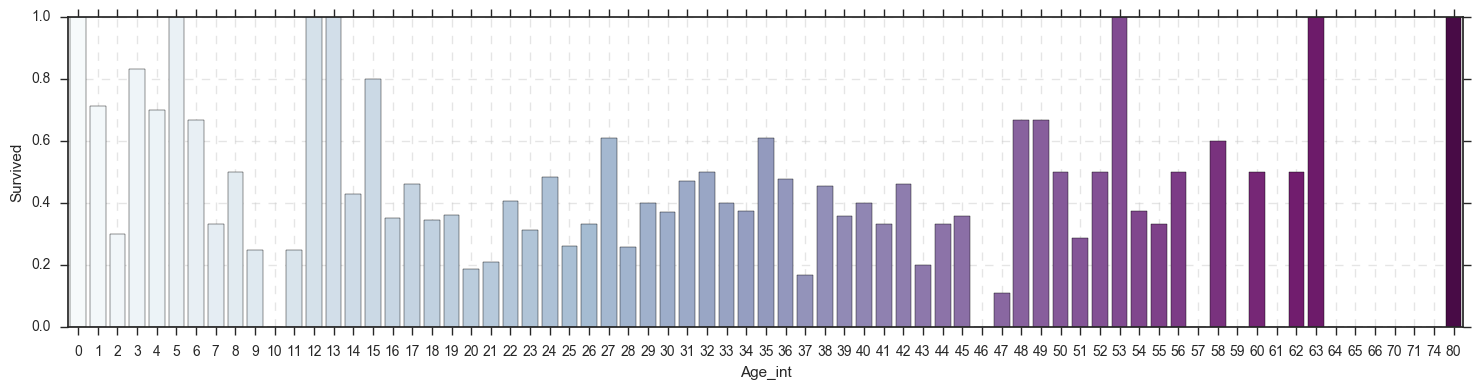

In [10]:
# 老人和小孩存活情况

plt.figure(figsize=(18,4))
train_data_age['Age_int'] = train_data_age['Age'].astype(int)
average_age = train_data_age[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int',y='Survived',data=average_age, palette = 'BuPu')
plt.grid(linestyle = '--',alpha = 0.5)
print('灾难中，老人和小孩存活率较高')

In [ ]:
'''
3、结合 SibSp、Parch字段，研究亲人多少与存活的关系
要求：
① 有无兄弟姐妹/父母子女和存活与否的关系
② 亲戚多少与存活与否的关系

'''

有兄弟姐妹、父母子女的乘客存活率更大


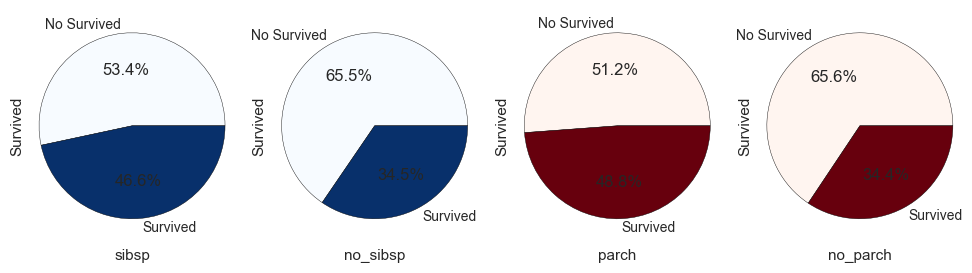

In [11]:
# 有无兄弟姐妹/父母子女和存活与否的关系

sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]
# 筛选出有无兄弟姐妹数据

parch_df = train_data[train_data['Parch'] != 0]  
no_parch_df = train_data[train_data['Parch'] == 0]
# 筛选出有无父母子女数据

plt.figure(figsize=(12,3))
plt.subplot(141)
plt.axis('equal')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%',colormap = 'Blues')
plt.xlabel('sibsp')
 
plt.subplot(142)
plt.axis('equal')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%',colormap = 'Blues')
plt.xlabel('no_sibsp')

plt.subplot(143)  
plt.axis('equal')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.1f%%',colormap = 'Reds')  
plt.xlabel('parch')  
 
plt.subplot(144)  
plt.axis('equal')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%',colormap = 'Reds')  
plt.xlabel('no_parch')

print('有兄弟姐妹、父母子女的乘客存活率更大')

若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低


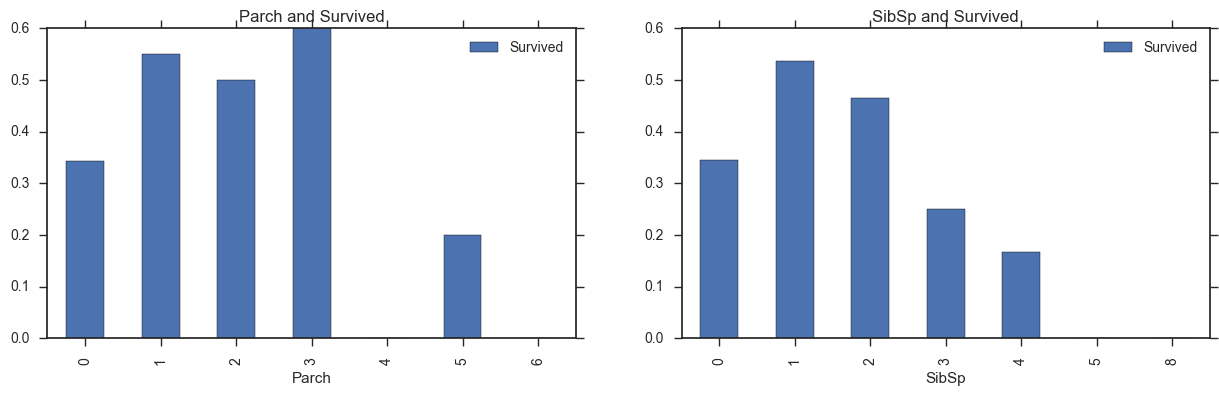

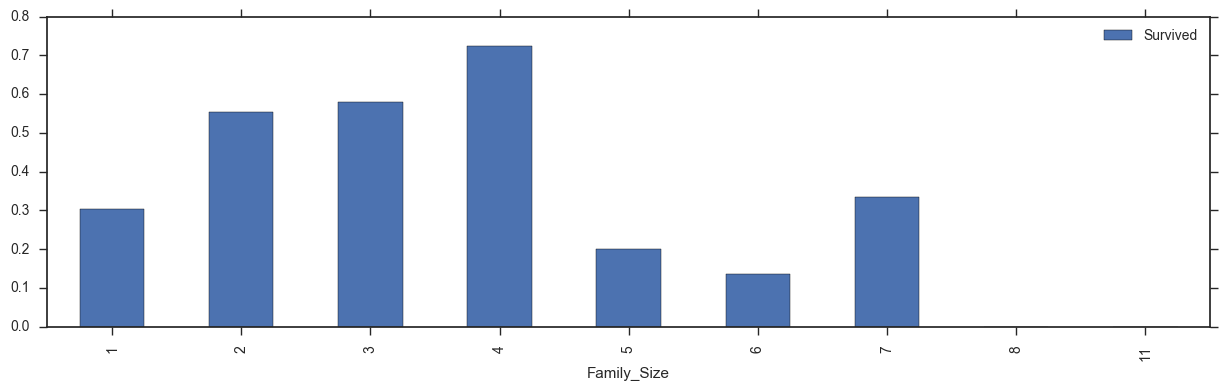

In [12]:
# 亲戚多少与存活与否的关系

fig, ax=plt.subplots(1,2,figsize=(15,4))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')
# 查看兄弟姐妹个数与存活率

train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']+1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar(figsize = (15,4))
# 查看父母子女个数与存活率

print('若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低')

In [ ]:
'''
4、结合票的费用情况，研究票价和存活与否的关系
要求：
① 票价分布和存活与否的关系
② 比较研究生还者和未生还者的票价情况

'''

生还者的平均票价要大于未生还者的平均票价


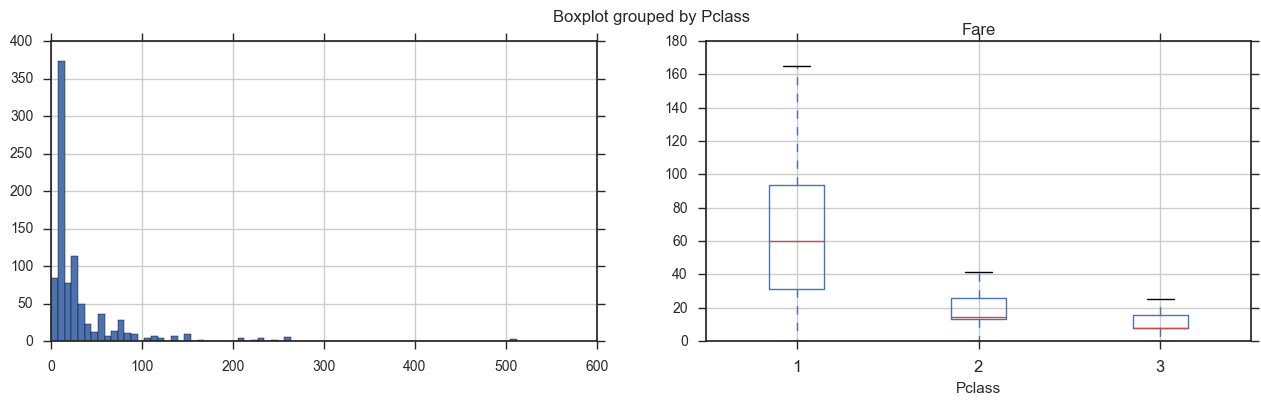

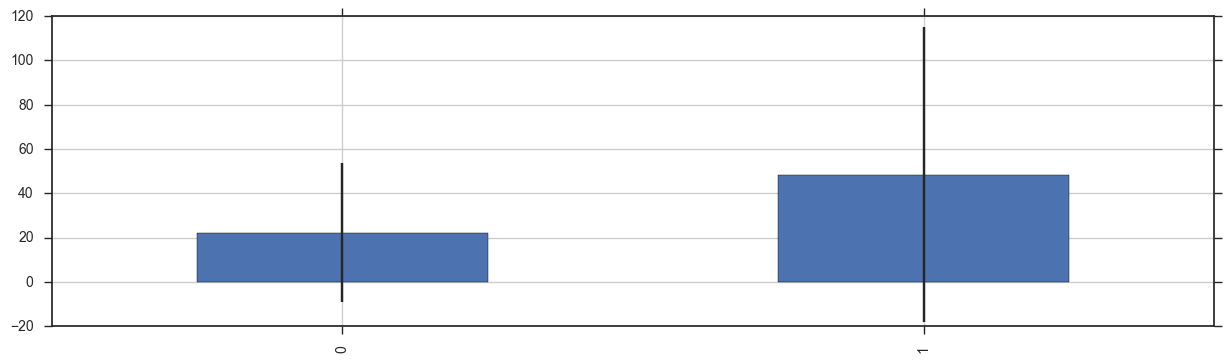

In [13]:
# 票价分布和存活与否的关系

fig, ax=plt.subplots(1,2,figsize=(15,4))
train_data['Fare'].hist(bins=70, ax = ax[0])
train_data.boxplot(column='Fare', by='Pclass', showfliers=False,ax = ax[1])
# 查看票价分布情况

fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]
# 基于票价，筛选出生存与否的数据
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar',legend=False,figsize = (15,4),grid = True)
# 查看票价与是否生还的关系

print('生还者的平均票价要大于未生还者的平均票价')

In [ ]:
'''
5、利用KNN分类模型，对结果进行预测
要求：
① 模型训练字段：'Survived','Pclass','Sex','Age','Fare','Family_Size'
② 模型预测test.csv样本数据的生还率
提示：
① 训练数据集中，性别改为数字表示 → 1代表男性，0代表女性

'''

In [14]:
# 数据清洗，提取训练字段

knn_train = train_data[['Survived','Pclass','Sex','Age','Fare','Family_Size']].dropna()
knn_train['Sex'][knn_train['Sex'] == 'male'] = 1 
knn_train['Sex'][knn_train['Sex'] == 'female'] = 0

test_data['Family_Size'] = test_data['Parch'] + test_data['SibSp']+1
knn_test = test_data[['Pclass','Sex','Age','Fare','Family_Size']].dropna()
knn_test['Sex'][knn_test['Sex'] == 'male'] = 1 
knn_test['Sex'][knn_test['Sex'] == 'female'] = 0

In [15]:
print('清洗后训练集样本数据量为%i个' % len(knn_train))
knn_train.head()

清洗后训练集样本数据量为714个


,Survived,Pclass,Sex,Age,Fare,Family_Size
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,2
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,1


In [16]:
print('清洗后测试集样本数据量为%i个' % len(knn_test))
knn_test.head()

清洗后测试集样本数据量为331个


,Pclass,Sex,Age,Fare,Family_Size
0,3,1,34.5,7.8292,1
1,3,0,47.0,7.0000,2
2,2,1,62.0,9.6875,1
3,3,1,27.0,8.6625,1
4,3,0,22.0,12.2875,3


In [17]:
# 模型预测test.csv样本数据的生还率

from sklearn import neighbors  
# 导入KNN分类模块

knn = neighbors.KNeighborsClassifier() 
knn.fit(knn_train[['Pclass','Sex','Age','Fare','Family_Size']], knn_train['Survived'])
# 构建模型

knn_test['predict'] = knn.predict(knn_test)
pre_survived = knn_test[knn_test['predict'] == 1].reset_index()
del pre_survived['index']
# 预测存货情况

print('finished!')

pre_survived

finished!


,Pclass,Sex,Age,Fare,Family_Size,predict
0,3,1,27.00,8.6625,1,1
1,2,1,26.00,29.0000,3,1
2,3,1,21.00,24.1500,3,1
3,1,0,23.00,82.2667,2,1
4,1,0,47.00,61.1750,2,1
5,2,0,24.00,27.7208,2,1
6,3,1,9.00,3.1708,2,1
7,1,1,21.00,61.3792,2,1
8,1,0,48.00,262.3750,5,1
9,1,0,22.00,61.9792,2,1
